In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Figure 1

In [2]:
df=pd.read_csv('cats.csv')
cats=['Hydrology','Biophysics','Stomatal Conductance &\nPhotosynthesis','Biogeochemistry','Fire',]

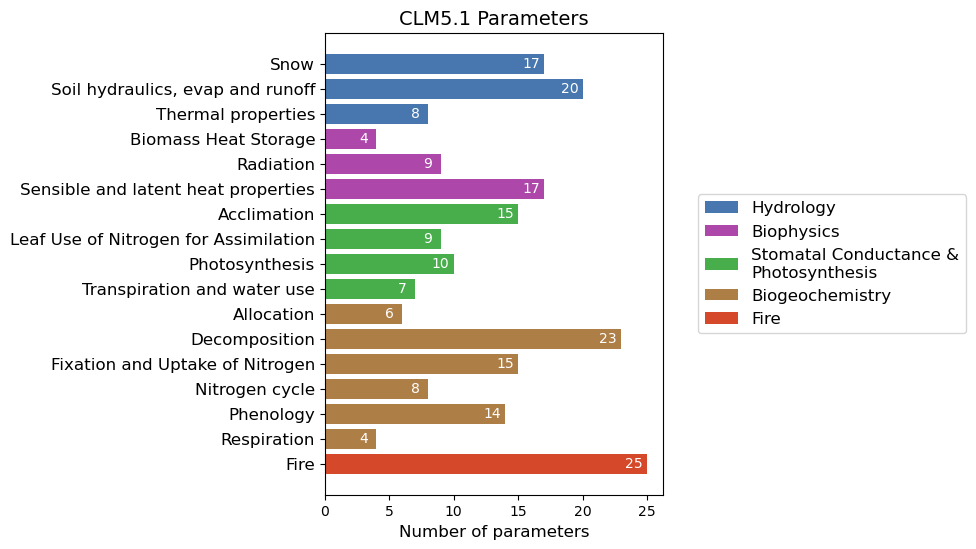

In [8]:
fig = plt.figure(figsize=[8,6])
axs = fig.subplot_mosaic('AX;AB;AY',gridspec_kw={'height_ratios': [1,4,1],'width_ratios': [3, 2]})

i=16
xlabs=[]
for cat in cats:
    cts=[]
    subs=np.unique(df.subcat[df.cat==cat].values)
    for sub in subs:
        xlabs.append(sub)
        cts.append((df.subcat==sub).sum())
    axs['A'].barh(i-np.arange(len(cts)),cts,facecolor=df.color[df.cat==cat].values[0],alpha=1)
    axs['B'].barh(i+np.arange(len(cts)),cts,facecolor=df.color[df.cat==cat].values[0],alpha=1,label=cat)
    
    for j,ct,sub in zip(i-np.arange(len(cts)),cts,subs):
        c=df.color[df.subcat==sub].values[0]
        axs['A'].text(ct-1,j,ct,ha='center',va='center',color='w')
        
    i-=len(cts)

axs['A'].set_yticks(range(17));
axs['A'].set_yticklabels(np.flip(xlabs),fontsize=12);
axs['A'].set_xlabel('Number of parameters',fontsize=12)
axs['A'].set_title('CLM5.1 Parameters',fontsize=14);

axs['B'].set_xlim([-10,-9])
axs['B'].legend(fontsize=12,loc=10)

axs['B'].set_axis_off()
axs['X'].set_axis_off()
axs['Y'].set_axis_off()

plt.savefig('../figs/main/bar.png',bbox_inches='tight');